- #### Giovanni Sinapi
- #### g.sinapi@gmail.com

<br>
<br>

In [24]:
from datetime import datetime
from dateutil import parser
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

#### Load the dataset and parse the date

In [7]:
data=pd.read_csv('/Users/gsi5878/Downloads/Klaviyo DS Screen 2.csv') 
data['date'] = pd.to_datetime(data.date)
data.head()

,customer_id,gender,date,value
0,1000,0,2017-01-01 00:11:00,198.5
1,1001,0,2017-01-01 00:29:00,338.0
2,1002,1,2017-01-01 01:30:00,733.0
3,1003,1,2017-01-01 01:34:00,772.0
4,1004,0,2017-01-01 03:11:00,508.0


In [8]:
data.describe()

,customer_id,gender,value
count,13471.000000,13471.000000,13471.000000
mean,5033.693564,0.498256,357.322179
std,2500.179222,0.500016,387.210821
min,1000.000000,0.000000,0.000000
25%,2890.500000,0.000000,161.200000
50%,4850.000000,0.000000,258.000000
75%,7157.000000,1.000000,426.000000
max,9813.000000,1.000000,8046.300000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 4 columns):
customer_id    13471 non-null int64
gender         13471 non-null int64
date           13471 non-null datetime64[ns]
value          13471 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 421.0 KB


We do not have any null values. 
<br>
<br>

### A) 

Assemble a dataframe with one row per customer and the following columns:
    - customer_id
    - gender
    - most_recent_order_date
    - order_count (number of orders placed by this customer)

#### Solution: 

I used the groupby method for creating a row for each customer with the related gender (since the gender does not change, I used the 'first' gender for each customer), date (in order to display the most recent date I used the 'last' method) and the count (I counted the occurences of the values of the order). 

In [17]:
data_grouped=data.groupby(['customer_id'], as_index=False).agg({'gender': ['first'], 'date': ['last'], 'value': ['count'] })
data_grouped.columns=['customer_id', 'gender', 'most_recent_order_date', 'order_count']
data_grouped.head()

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:00,1
1,1001,0,2017-01-01 00:29:00,1
2,1002,1,2017-02-19 21:35:00,3
3,1003,1,2017-04-26 02:37:00,4
4,1004,0,2017-01-01 03:11:00,1


<br>

### B) 

Plot the count of orders per week.

#### Solution:

I used the value_counts method to count the occuerences for each day and used the resample method with frequency weekly ('W') to calculate the counts of order for each week. At the end, I plotted the weekly orders. 

In [20]:
c=pd.value_counts(data['date'], sort = False).sort_index()

In [21]:
weekly = c.resample('W').sum()

In [22]:
weekly

2017-01-01     14
2017-01-08    180
2017-01-15    264
2017-01-22    405
2017-01-29    233
2017-02-05    211
2017-02-12    195
2017-02-19    248
2017-02-26    315
2017-03-05    260
2017-03-12    318
2017-03-19    269
2017-03-26    240
2017-04-02    237
2017-04-09    350
2017-04-16    284
2017-04-23    220
2017-04-30    223
2017-05-07    257
2017-05-14    337
2017-05-21    627
2017-05-28    301
2017-06-04    215
2017-06-11    219
2017-06-18    310
2017-06-25    276
2017-07-02    380
2017-07-09    286
2017-07-16    226
2017-07-23    244
2017-07-30    188
2017-08-06    183
2017-08-13    192
2017-08-20    178
2017-08-27    302
2017-09-03    200
2017-09-10    218
2017-09-17    237
2017-09-24    172
2017-10-01    201
2017-10-08    347
2017-10-15    345
2017-10-22    182
2017-10-29    154
2017-11-05    159
2017-11-12    170
2017-11-19    183
2017-11-26    391
2017-12-03    343
2017-12-10    236
2017-12-17    294
2017-12-24    208
2017-12-31    244
Freq: W-SUN, Name: date, dtype: int64

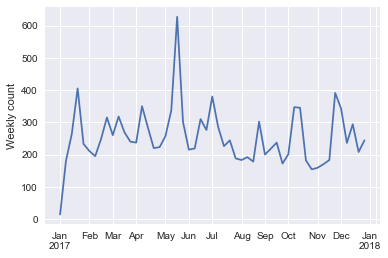

In [26]:
weekly.plot(style=['-'])
plt.ylabel('Weekly count');

This shows us some interesting seasonal trends: 

- The peaks of order were placed during the third week of Jan, the third week of May and the first week of December

<br>

### C) 

Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

Group by gender and calculate the mean order value. 

In [86]:
gender_data=data.groupby(['gender'], as_index=False).agg({'value': ['mean']})
gender_data.columns=['gender', 'mean_order_value']
gender_data

,gender,mean_order_value
0,0,363.890006
1,1,350.708361


Calculate the number of purchases made by each gender. The gender 0 made slightly more purchases than gender 1

In [79]:
pd.value_counts(data['gender'], sort = False).sort_index()

0    6759
1    6712
Name: gender, dtype: int64

A more detailed result about the main statistics about genders: 

In [109]:
data.groupby("gender")['value'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,6759.0,363.890006,396.533215,0.0,161.93,258.0,434.0,8046.3
1,6712.0,350.708361,377.504737,0.0,161.20,258.0,416.0,6877.0


<br>

#### Solution


In order to test the significance in the two averages, I am going to  calculate the T-test for the means of two independent samples of scores. 

We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, then we reject the null hypothesis of equal averages.

Therefore, the hypothesis being tested is:

- Null hypothesis (H0): u0 = u1, which translates to the mean of gender_0 is equal to the mean of gender_1
- Alternative hypothesis (HA): u0 ≠ u1, which translates to the mean of gender_0 is not equal to the mean of gender_1

Again, if the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.

In the following analysis, I considered a threshold of 0.05 for p-value. 



In [91]:
import scipy.stats as stats

Subset dataframe based on the value associated to each gender

In [112]:
gender_0=data['value'][data['gender']==0]
gender_1=data['value'][data['gender']==1]

Use the built-in ttest_ind function In scipy.stats 

In [126]:
t_stat, p_val = stats.ttest_ind(gender_0, gender_1)

Value of the statistics:

In [127]:
t_stat

1.9757691572170935

P-value: 

In [128]:
p_val

0.04820130539124317

We obtained p-value smaller than 0.05, then we can conclude that we can reject the null hypothesis of equal averages (albeit p-value is very close to the threshold 0.05).

However I would suggest the following two conclusions:

- (1) formally reject the null hypothesis: even if it were very close to 0.05 it should still be rejected; 
- (2) note that there's nothing particularly special about α=0.05 and it's very close to that borderline -- even a slightly smaller significance threshold would not lead to rejection. P-values very close to the cutoff (0.05) are considered to be marginal (could go either way). 

Therefore I would conclude that the difference in the averages of values between genders is not statistically significant. 